# Education Budget Allocation In Nigeria (1988-2022)

In [1]:
#import our libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import our csv files
df1= pd.read_csv('C:/Users/user/Downloads/edu1.csv')
df2= pd.read_csv('C:/Users/user/Downloads/edu2.csv')
asuu= pd.read_csv('C:/Users/user/Downloads/asuu.csv')

In [3]:
df1.head()

,S/N,Year,Total budget,Allocation Education
0,1,1988,"24, 365, 232, 328","584, 130, 070"
1,2,1989,"30, 107, 057, 130","1,067 179, 030"
2,3,1990,"39, 763, 988, 960","1,126, 664, 140"
3,4,1991,"38, 665, 978, 779","419, 906, 180"
4,5,1992,"52, 036, 021, 610","2,008, 340, 430"


In [4]:
df2.head()

,S/N,Year,Total budget,Allocation Education
0,1,2009,"3,049,000,000,000","221,019,000,000"
1,2,2010,"5,160,000,000,000","249,009,000,000"
2,3,2011,"4,972,000,000,000","306,003,000,000"
3,4,2012,"4,877,000,000,000","400,015,000,000"
4,5,2013,"4,987,000,000,000","426,053,000,000"


In [5]:
#concating both dataframes so we have a single dataframe
df3= pd.concat([df1, df2], axis=0, ignore_index=True, verify_integrity=True)

In [6]:
df3.head()

,S/N,Year,Total budget,Allocation Education
0,1,1988,"24, 365, 232, 328","584, 130, 070"
1,2,1989,"30, 107, 057, 130","1,067 179, 030"
2,3,1990,"39, 763, 988, 960","1,126, 664, 140"
3,4,1991,"38, 665, 978, 779","419, 906, 180"
4,5,1992,"52, 036, 021, 610","2,008, 340, 430"


In [7]:
#dropping the serial number column
df3.drop(columns= 'S/N', inplace=True)

In [8]:
df3.head()

,Year,Total budget,Allocation Education
0,1988,"24, 365, 232, 328","584, 130, 070"
1,1989,"30, 107, 057, 130","1,067 179, 030"
2,1990,"39, 763, 988, 960","1,126, 664, 140"
3,1991,"38, 665, 978, 779","419, 906, 180"
4,1992,"52, 036, 021, 610","2,008, 340, 430"


In [9]:
#data collected from articles had missing dates, did some manual inputs from figures obtained from the web
budg_to_2022= {'Year':['2008','2019', '2020', '2021', '2022'],
            'Total budget': ['2,740,000,000,000','8,916,964,099,393','10,810,800,872,072',
                             '13,588,027,886,175', '16,391,023,917,692'],
            'Allocation Education':['356,200,000,000', '634,557,159,877', 
                                    '607,664,880,997', '771,461,372,053','705,275,929,291']}
budg_to_2022=pd.DataFrame(budg_to_2022)
budg_to_2022

,Year,Total budget,Allocation Education
0,2008,"2,740,000,000,000","356,200,000,000"
1,2019,"8,916,964,099,393","634,557,159,877"
2,2020,"10,810,800,872,072","607,664,880,997"
3,2021,"13,588,027,886,175","771,461,372,053"
4,2022,"16,391,023,917,692","705,275,929,291"


In [10]:
#concating it to our dataframes
Nig_edu_budget=pd.concat([df3, budg_to_2022], verify_integrity= True, ignore_index=True)

In [11]:
#checking the last 5 rows to see if the data has been merged
Nig_edu_budget.tail()

,Year,Total budget,Allocation Education
30,2008,"2,740,000,000,000","356,200,000,000"
31,2019,"8,916,964,099,393","634,557,159,877"
32,2020,"10,810,800,872,072","607,664,880,997"
33,2021,"13,588,027,886,175","771,461,372,053"
34,2022,"16,391,023,917,692","705,275,929,291"


In [12]:
#renaming our column names
Nig_edu_budget.rename(columns={'Year': 'year', 'Total budget': 'total_budget', 
                               'Allocation Education': 'education_budget'}, inplace=True)

In [13]:
#checking column types
Nig_edu_budget.dtypes

year                object
total_budget        object
education_budget    object
dtype: object

In [14]:
#removing comma from the numbers so we can convert to int
cols= ['total_budget', 'education_budget']

Nig_edu_budget[cols]= Nig_edu_budget[cols].replace(',','', regex=True)

#removing trailing spaces
Nig_edu_budget[cols]= Nig_edu_budget[cols].replace(' ','', regex=True)

In [15]:
Nig_edu_budget.head()

,year,total_budget,education_budget
0,1988,24365232328,584130070
1,1989,30107057130,1067179030
2,1990,39763988960,1126664140
3,1991,38665978779,419906180
4,1992,52036021610,2008340430


In [16]:
#converting data type to int
cols= ['total_budget', 'education_budget']

Nig_edu_budget[cols]= Nig_edu_budget[cols].apply(pd.to_numeric, errors= 'coerce', axis=1 )

#convert year to string
Nig_edu_budget['year']= Nig_edu_budget['year'].astype('str')

In [17]:
#using the assert statement to see if the column datatype is now int
assert Nig_edu_budget['total_budget'].dtype == 'int64'

In [18]:
#sorting our values
Nig_edu_budget.sort_values('year', inplace=True)

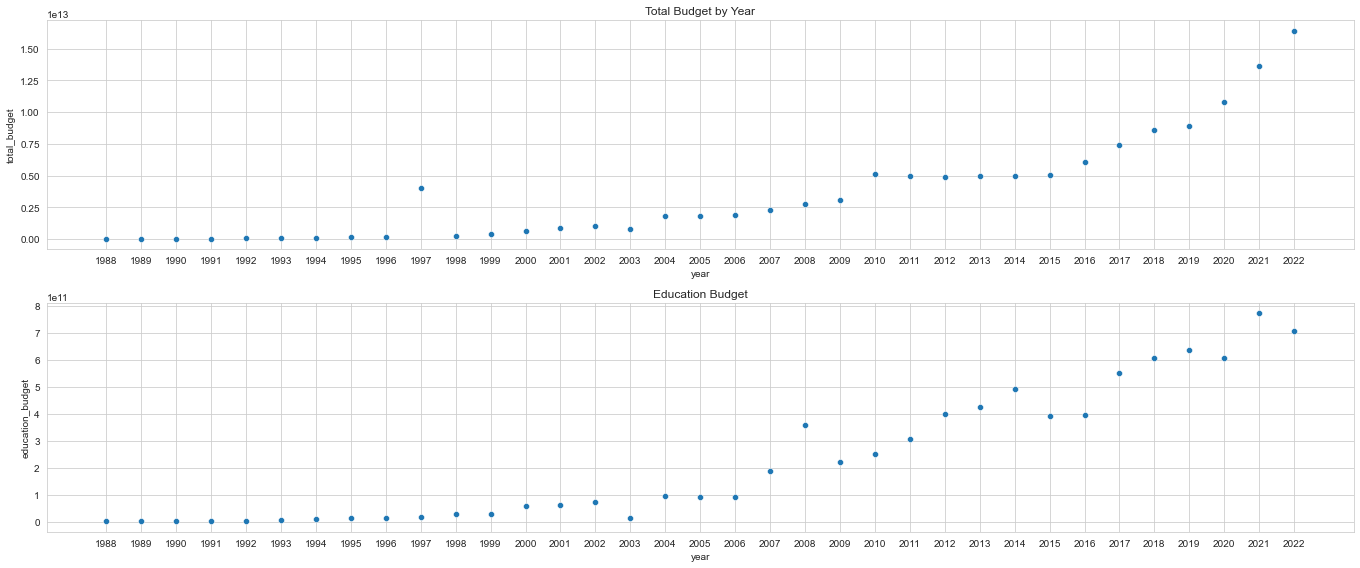

In [19]:
#lets visualize our data to get a quick visual of it
sns.set_style(style='whitegrid')
fig,ax =plt.subplots(nrows=2, ncols=1, figsize=(19,8))

sns.scatterplot(ax= ax[0], x= 'year', y='total_budget', data= Nig_edu_budget)
ax[0].set_title('Total Budget by Year')


sns.scatterplot(ax=ax[1], x= 'year', y='education_budget', data= Nig_edu_budget)
ax[1].set_title('Education Budget')


plt.tight_layout()

In [21]:
#we have outliers, there seems to be an error input in the 1997 total budget
#lets find out

Nig_edu_budget[Nig_edu_budget['year'].isin(['1997'])]

,year,total_budget,education_budget
9,1997,4004000000000,16440162819


In [22]:
#the total budget for 1997 has an additional 0 to it which needs to be removed
Nig_edu_budget['total_budget']=Nig_edu_budget['total_budget'].replace(4004000000000, 400400000000)

In [23]:
Nig_edu_budget

,year,total_budget,education_budget
0,1988,24365232328,584130070
1,1989,30107057130,1067179030
2,1990,39763988960,1126664140
3,1991,38665978779,419906180
4,1992,52036021610,2008340430
5,1993,114600529300,6436080750
6,1994,110500000000,7878084920
7,1995,155500000000,12728676390
8,1996,188221068083,12135951790
9,1997,400400000000,16440162819


In [24]:
#lets take a look at our third table
asuu.dtypes

Years        int64
Duration    object
dtype: object

In [25]:
#renaming column names
asuu.rename(columns = {'Years':'year_of_strike', 'Duration': 'duration_of_strike'},inplace= True)

In [26]:
#converting int to str
asuu['year_of_strike']=asuu['year_of_strike'].astype('str')

In [28]:
#using the assert statement to see if the data type was converted to object type data
assert asuu['year_of_strike'].dtype == 'object'

In [29]:
asuu.head()

,year_of_strike,duration_of_strike
0,1992,3 months
1,1993,4 months
2,1996,6 months
3,1999,5 months strike
4,2001,3 months strike


In [30]:
#removing 'strike' from values in the second column
asuu['duration_of_strike']= asuu['duration_of_strike'].replace('strike','',regex=True)

In [33]:
#merging our two dataframes on the year column so we can see the budget allocated for the year when each academic strike occurred
academic_strike= pd.merge(Nig_edu_budget, asuu, left_on='year', right_on='year_of_strike', how='inner',
                         validate= 'one_to_one')
academic_strike.head()

,year,total_budget,education_budget,year_of_strike,duration_of_strike
0,1992,52036021610,2008340430,1992,3 months
1,1993,114600529300,6436080750,1993,4 months
2,1996,188221068083,12135951790,1996,6 months
3,1999,419500000000,27712000000,1999,5 months
4,2001,894214805186,62567055443,2001,3 months


In [35]:
#lets drop the 'year_of_strike' column since we have a year column already
academic_strike.drop(columns='year_of_strike', inplace=True)

In [37]:
academic_strike.dtypes

year                  object
total_budget           int64
education_budget       int64
duration_of_strike    object
dtype: object

In [39]:
Nig_edu_budget.to_csv('Education_budget_Nigeria.csv', index= False)
academic_strike.to_csv('Academic strike.csv', index= False)

## Data is ready to be imported to SQL for analysis